In [75]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [123]:
import keras.backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils.np_utils import to_categorical
from keras.constraints import max_norm
from keras.optimizers import SGD

In [143]:
data_set = np.loadtxt('dataset.csv', delimiter=',', dtype=np.uint8)

In [144]:
np.random.shuffle(data_set)
Y = data_set[:,:1].astype('uint8')
X = data_set[:,1:].reshape(data_set.shape[0],900)

In [145]:
trainset_num = int(len(X) * 0.7) # classical split 70/30

X_train = X[:trainset_num]
# X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X[trainset_num:]
# X_test = X_test.astype('float32')
X_test = X_test/255

In [146]:
classes_num = 10

Y_train = Y[:trainset_num]
Y_train = to_categorical(Y_train, classes_num)

Y_test = Y[trainset_num:]
Y_test = to_categorical(Y_test, classes_num)

Отображаем часть картинок с номерами классов.

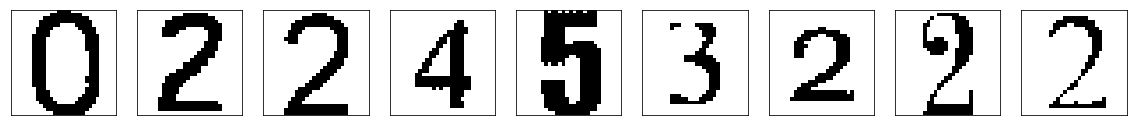

In [147]:
images_n_to_display = 9
sample_images = X_train[:images_n_to_display].reshape((images_n_to_display,30,30))

fig, axes = plt.subplots(ncols=images_n_to_display)
fig.set_figwidth(20)

for i in range(images_n_to_display):
    axes[i].imshow(sample_images[i], cmap=plt.cm.binary_r)
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].text(24,3,np.argmax(Y_train[i]), color='white', size='x-large')

In [148]:
model = Sequential()

model.add(Dropout(0.2, input_shape=(900,)))
model.add(Dense(200, activation=K.relu, kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(200, activation=K.relu, kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

optimizer = SGD(momentum=0.9)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [149]:
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Train on 526 samples, validate on 132 samples
Epoch 1/50
526/526 [==============================] - 0s - loss: 2.2555 - acc: 0.1844 - val_loss: 1.6423 - val_acc: 0.5758
Epoch 2/50
526/526 [==============================] - 0s - loss: 1.4399 - acc: 0.4905 - val_loss: 0.8163 - val_acc: 0.7803
Epoch 3/50
526/526 [==============================] - 0s - loss: 0.8860 - acc: 0.6920 - val_loss: 0.7284 - val_acc: 0.7348
Epoch 4/50
526/526 [==============================] - 0s - loss: 0.5503 - acc: 0.8042 - val_loss: 0.3448 - val_acc: 0.8788
Epoch 5/50
526/526 [==============================] - 0s - loss: 0.3268 - acc: 0.9011 - val_loss: 0.2218 - val_acc: 0.9394
Epoch 6/50
526/526 [==============================] - 0s - loss: 0.2478 - acc: 0.9240 - val_loss: 0.1220 - val_acc: 0.9773
Epoch 7/50
526/526 [==============================] - 0s - loss: 0.2033 - acc: 0.9354 - val_loss: 0.0926 - val_acc: 0.9773
Epoch 8/50
526/526 [==============================] - 0s - loss: 0.2018 - acc: 0.9221 - val_l

In [150]:
(loss, score) = model.evaluate(X_test, Y_test)

 32/282 [==>...........................] - ETA: 0s

In [151]:
loss

0.018244692613205587

In [152]:
score

0.99290780141843971

In [153]:
model_prediction = model.predict_classes(X_test)
true_classes = np.argmax(Y_test, 1)
error_indexes = np.argwhere(model_prediction - true_classes)

 32/282 [==>...........................] - ETA: 0s

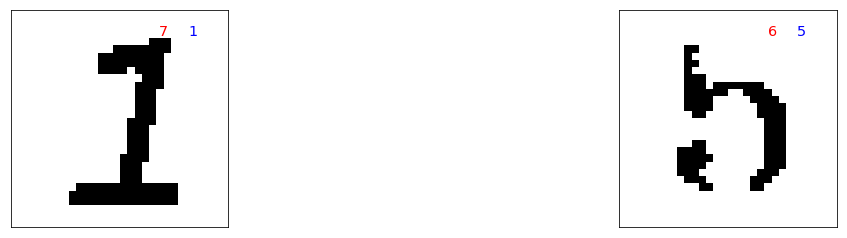

In [154]:
n_errors = len(error_indexes)
images_n_to_display = n_errors if n_errors < 9 else 9

image_indexes = error_indexes[:images_n_to_display].reshape(images_n_to_display)

sample_images = X_test[image_indexes].reshape((images_n_to_display,30,30))

if n_errors != 1 and n_errors != 0:
    fig, axes = plt.subplots(ncols=images_n_to_display)
    fig.set_figwidth(20)
    
    for i in range(images_n_to_display):
        axes[i].imshow(sample_images[i], cmap=plt.cm.binary_r)
        axes[i].set_xticks(())
        axes[i].set_yticks(())
        axes[i].text(24,3,true_classes[image_indexes[i]], color='blue', size='x-large')
        axes[i].text(20,3,model_prediction[image_indexes[i]], color='red', size='x-large')
        
elif n_errors == 1:
    plt.imshow(sample_images[0], cmap=plt.cm.binary_r)
    plt.text(24,3,true_classes[image_indexes[i]], color='blue', size='x-large')
    plt.text(20,3,model_prediction[image_indexes[i]], color='red', size='x-large')

In [155]:
model.save('classifier.h5')